In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Data Read
ht=pd.read_csv('heart.txt',sep=',',header=0)

In [3]:
ht.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
ht.shape

(200, 14)

In [5]:
ht.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
ht.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

# EDA

In [7]:
ht.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
bu=ht[['exang','thal','slope']]
bu

,exang,thal,slope
0,1,?,2
1,0,?,?
2,1,?,3
3,1,?,1
4,1,?,2
5,0,?,1
6,1,?,?
7,1,?,2
8,1,?,1
9,0,?,2


In [9]:
bu.mode()

,exang,thal,slope
0,1,?,?


In [10]:
bu['exang'].value_counts()
bu['exang'].replace({'?':1},inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
bu['thal'].value_counts()
bu['thal'].replace({'?':7},inplace=True)

In [12]:
bu['slope'].value_counts()
bu['slope'].replace({'?':2},inplace=True)

In [13]:
bu

,exang,thal,slope
0,1,7,2
1,0,7,2
2,1,7,3
3,1,7,1
4,1,7,2
5,0,7,1
6,1,7,2
7,1,7,2
8,1,7,1
9,0,7,2


In [14]:
ht['exang']=bu['exang']
ht['thal']=bu['thal']
ht['slope']=bu['slope']

In [15]:
ht.replace({'?':0},inplace=True)
ht

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,7,2
1,44,1,4,130,209,0,1,127,0,0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,0,7,0
6,65,1,4,150,236,1,1,105,1,0,2,0,7,3
7,60,1,3,180,0,0,1,140,1,1.5,2,0,7,0
8,60,1,3,120,0,0,0,141,1,2,1,0,7,3
9,60,1,2,160,267,1,1,157,0,0.5,2,0,7,1


In [16]:
op=ht['oldpeak']

In [17]:
ht.drop('oldpeak',axis=1,inplace=True)

In [18]:
ht=ht.astype(int)
ht.dtypes

age         int32
sex         int32
cp          int32
trestbps    int32
chol        int32
fbs         int32
restecg     int32
thalach     int32
exang       int32
slope       int32
ca          int32
thal        int32
num         int32
dtype: object

In [19]:
ht['oldpeak']=op
ht.dtypes

age          int32
sex          int32
cp           int32
trestbps     int32
chol         int32
fbs          int32
restecg      int32
thalach      int32
exang        int32
slope        int32
ca           int32
thal         int32
num          int32
oldpeak     object
dtype: object

In [20]:
ht['oldpeak'].astype(float)

0      3.0
1      0.0
2      1.5
3      2.5
4      1.3
5     -0.5
6      0.0
7      1.5
8      2.0
9      0.5
10     0.0
11     1.0
12     0.5
13     0.0
14     1.0
15     0.0
16     2.5
17     2.0
18     1.5
19     0.0
20     1.0
21     2.0
22     0.0
23     0.0
24     3.0
25     1.0
26     0.0
27     0.5
28     1.5
29     0.0
      ... 
170    2.0
171    1.0
172    2.0
173    0.0
174    0.0
175    0.0
176    2.0
177    0.0
178    1.0
179    0.5
180    0.0
181    0.0
182    1.7
183    1.5
184    1.0
185    0.0
186    0.0
187    0.0
188    1.5
189    0.0
190    1.0
191    3.0
192    1.5
193    0.0
194    0.0
195    0.0
196    0.0
197    0.0
198    0.0
199    0.0
Name: oldpeak, Length: 200, dtype: float64

In [21]:
ht.apply(lambda x: (x==0).sum())

age           0
sex           6
cp            0
trestbps     57
chol         56
fbs         132
restecg      80
thalach      53
exang        52
slope         0
ca          200
thal          0
num          51
oldpeak      56
dtype: int64

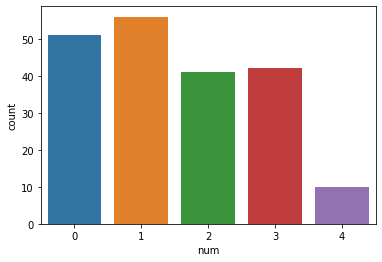

In [22]:
sns.countplot(ht['num'])

In [23]:
ht['num'].replace({2:1},inplace=True)
ht['num'].replace({3:1},inplace=True)
ht['num'].replace({4:1},inplace=True)

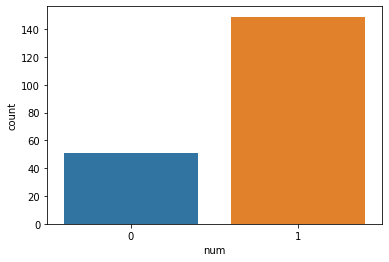

In [24]:
sns.countplot(ht['num'])

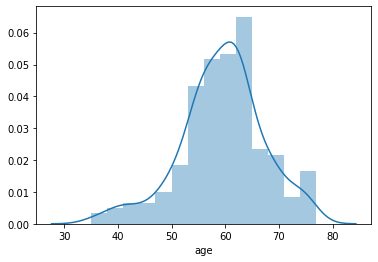

In [25]:
sns.distplot(ht['age'])

In [26]:
min(ht['age'])

35

In [27]:
max(ht['age'])

77

In [28]:
ht['age']=pd.cut(ht['age'],bins=(34,50,65,78),labels=['young','mid','old'])

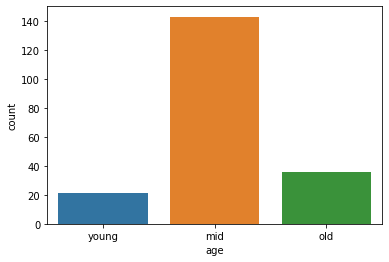

In [29]:
sns.countplot(ht['age'])

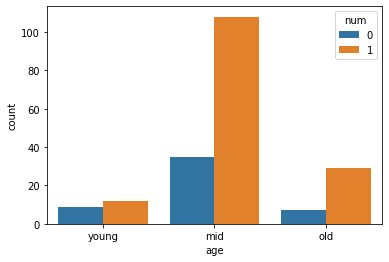

In [30]:
sns.countplot(ht['age'],hue=ht['num'])

In [31]:
a=ht.groupby('age')['num'].value_counts()
a

age    num
young  1       12
       0        9
mid    1      108
       0       35
old    1       29
       0        7
Name: num, dtype: int64

In [32]:
a/ht['num'].count()*100

age    num
young  1       6.0
       0       4.5
mid    1      54.0
       0      17.5
old    1      14.5
       0       3.5
Name: num, dtype: float64

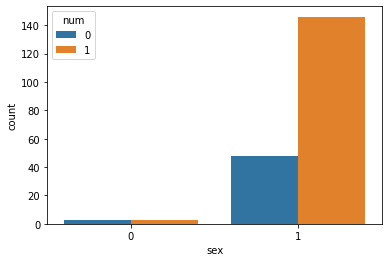

In [33]:
sns.countplot(ht['sex'],hue=ht['num'])

#Female count is lower than male

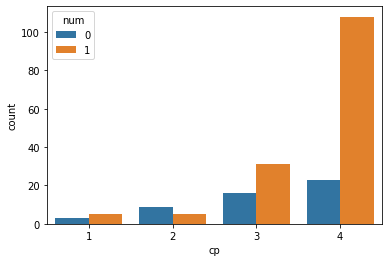

In [34]:
sns.countplot(ht['cp'],hue=ht['num'])

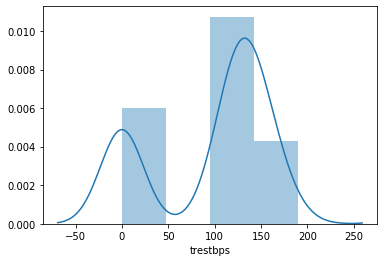

In [35]:
sns.distplot(ht['trestbps'])

In [36]:
ht.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.0,200.000000,200.000000
mean,0.970000,3.505000,96.310000,172.490000,0.340000,0.735000,90.25500,0.740000,2.065000,0.0,6.880000,0.745000
std,0.171015,0.795701,62.917781,116.752497,0.474898,0.683455,57.50237,0.439735,0.471046,0.0,0.589353,0.436955
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.0,3.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.0,7.000000,0.000000
50%,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.50000,1.000000,2.000000,0.0,7.000000,1.000000
75%,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,0.0,7.000000,1.000000
max,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,3.000000,0.0,7.000000,1.000000


In [37]:
a=ht['trestbps'].mean()
ht['trestbps'].replace({0:a},inplace=True)

In [38]:
min(ht['trestbps'])

96.0

In [39]:
max(ht['trestbps'])

190.0

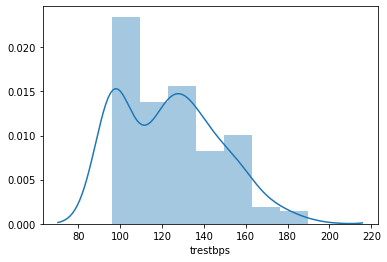

In [40]:
sns.distplot(ht['trestbps'])

In [41]:
ht['trestbps']=pd.cut(ht['trestbps'],bins=(80,121,151,200),labels=['normal','moderate','high'])

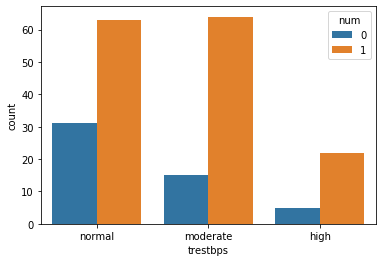

In [42]:
sns.countplot(ht['trestbps'],hue=ht['num'])

In [43]:
c=ht['chol'].mean()
ht['chol'].replace({0:c},inplace=True)

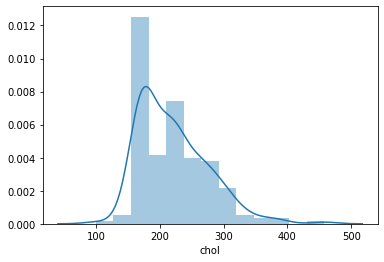

In [44]:
sns.distplot(ht['chol'])

In [45]:
min(ht['chol'])

100.0

In [46]:
max(ht['chol'])

458.0

In [47]:
ht['chol']=pd.cut(ht['chol'],bins=(90,200,300,500),labels=['lowch','mediumch','highch'])

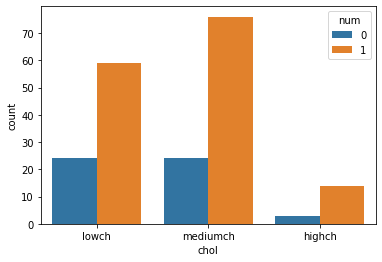

In [48]:
sns.countplot(ht['chol'],hue=ht['num'])

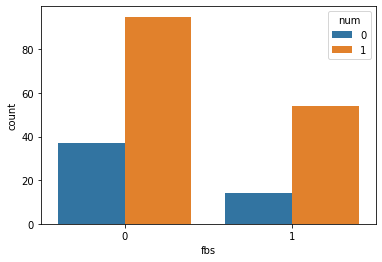

In [49]:
sns.countplot(ht['fbs'],hue=ht['num'])

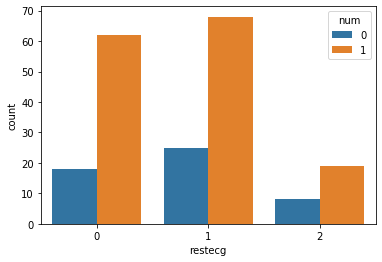

In [50]:
sns.countplot(ht['restecg'],hue=ht['num'])

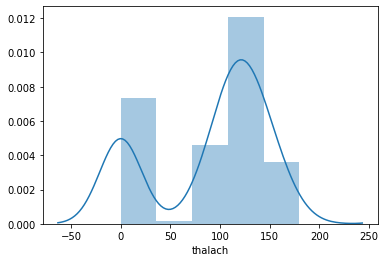

In [51]:
sns.distplot(ht['thalach'])


In [52]:
d=ht['thalach'].mean()
ht['thalach'].replace({0:d},inplace=True)

In [53]:
ht.drop('ca',axis=1,inplace=True)
ht

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,thal,num,oldpeak
0,mid,1,4,moderate,mediumch,0,1,112.000,1,2,7,1,3
1,young,1,4,moderate,mediumch,0,1,127.000,0,2,7,0,0
2,mid,1,4,moderate,mediumch,0,1,140.000,1,3,7,1,1.5
3,mid,1,4,moderate,mediumch,0,1,149.000,1,1,7,1,2.5
4,old,1,3,normal,mediumch,1,2,99.000,1,2,7,0,1.3
5,old,1,3,normal,lowch,0,1,120.000,0,1,7,0,-0.5
6,mid,1,4,moderate,mediumch,1,1,105.000,1,2,7,1,0
7,mid,1,3,high,lowch,0,1,140.000,1,2,7,0,1.5
8,mid,1,3,normal,lowch,0,0,141.000,1,1,7,1,2
9,mid,1,2,high,mediumch,1,1,157.000,0,2,7,1,0.5


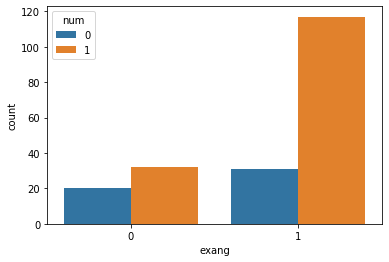

In [54]:
sns.countplot(ht['exang'],hue=ht['num'])

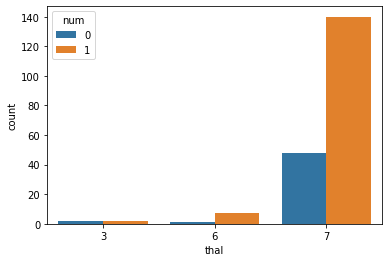

In [55]:
sns.countplot(ht['thal'],hue=ht['num'])

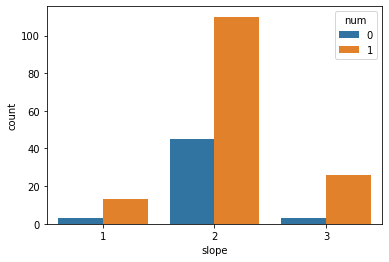

In [56]:
sns.countplot(ht['slope'],hue=ht['num'])

In [57]:
ht['oldpeak'].value_counts()

0       56
0       40
2       25
1.5     21
1       18
3       13
2.5      9
0.5      7
4        4
1.3      2
1.7      1
3.5      1
0.8      1
1.6      1
-0.5     1
Name: oldpeak, dtype: int64

In [58]:
ht=pd.get_dummies(ht,drop_first=True)
ht

,sex,cp,fbs,restecg,thalach,exang,slope,thal,num,age_mid,...,oldpeak_1,oldpeak_1.3,oldpeak_1.5,oldpeak_1.6,oldpeak_1.7,oldpeak_2,oldpeak_2.5,oldpeak_3,oldpeak_3.5,oldpeak_4
0,1,4,0,1,112.000,1,2,7,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,4,0,1,127.000,0,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,0,1,140.000,1,3,7,1,1,...,0,0,1,0,0,0,0,0,0,0
3,1,4,0,1,149.000,1,1,7,1,1,...,0,0,0,0,0,0,1,0,0,0
4,1,3,1,2,99.000,1,2,7,0,0,...,0,1,0,0,0,0,0,0,0,0
5,1,3,0,1,120.000,0,1,7,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,4,1,1,105.000,1,2,7,1,1,...,0,0,0,0,0,0,0,0,0,0
7,1,3,0,1,140.000,1,2,7,0,1,...,0,0,1,0,0,0,0,0,0,0
8,1,3,0,0,141.000,1,1,7,1,1,...,0,0,0,0,0,1,0,0,0,0
9,1,2,1,1,157.000,0,2,7,1,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score  

In [60]:
X = ht.drop('num',axis=1)
y = ht['num']

In [61]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state = 8)
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(140, 28) (60, 28) (140,) (60,)


In [62]:
X_train1.head()

,sex,cp,fbs,restecg,thalach,exang,slope,thal,age_mid,age_old,...,oldpeak_1,oldpeak_1.3,oldpeak_1.5,oldpeak_1.6,oldpeak_1.7,oldpeak_2,oldpeak_2.5,oldpeak_3,oldpeak_3.5,oldpeak_4
183,1,4,1,0,98.000,0,2,7,1,0,...,0,0,1,0,0,0,0,0,0,0
113,1,4,0,0,90.255,1,2,7,0,1,...,0,0,0,0,0,0,0,0,0,0
79,0,4,0,0,140.000,1,2,7,1,0,...,1,0,0,0,0,0,0,0,0,0
180,1,4,0,2,100.000,0,2,7,1,0,...,0,0,0,0,0,0,0,0,0,0
189,1,3,1,0,151.000,1,2,3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
log = LogisticRegression(random_state=42)
logmodel = log.fit(X_train1, y_train1)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
print("Training accuracy",log.score(X_train1,y_train1))  
print("Testing accuracy",log.score(X_test1, y_test1))

Training accuracy 0.7857142857142857
Testing accuracy 0.7666666666666667


In [65]:
y_pred1 = logmodel.predict(X_test1)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [66]:
print("F1 Score: ",f1_score(y_test1, y_pred1, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test1,y_pred1), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test1, y_pred1), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test1,y_pred1))

F1 Score:  0.86 
Classification Report
                precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.77      0.98      0.86        44

    accuracy                           0.77        60
   macro avg       0.76      0.58      0.58        60
weighted avg       0.76      0.77      0.71        60
 
Confusion Matrix
  [[ 3 13]
 [ 1 43]] 
ROC AUC Score:  0.5823863636363636


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=3 ,n_jobs=None ,random_state=42)
Model = rfc.fit(X_train1, y_train1)

In [69]:
y_pred = Model.predict(X_test1)

In [70]:
print("Training accuracy",rfc.score(X_train1,y_train1))  
print("Testing accuracy",rfc.score(X_test1, y_test1))

Training accuracy 0.9642857142857143
Testing accuracy 0.7833333333333333


In [71]:
print("F1 Score: ",f1_score(y_test1, y_pred, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test1,y_pred), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test1, y_pred), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test1,y_pred))

F1 Score:  0.865979381443299 
Classification Report
                precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.79      0.95      0.87        44

    accuracy                           0.78        60
   macro avg       0.75      0.63      0.65        60
weighted avg       0.77      0.78      0.75        60
 
Confusion Matrix
  [[ 5 11]
 [ 2 42]] 
ROC AUC Score:  0.6335227272727273
